In [3]:
import torch
import numpy as np
from torch import nn
import matplotlib.pyplot as plt

In [4]:
#a*x**2 + b*x + c = 0

a = 0.5
b = 0.3
c = 0.2

x_data = torch.arange(-2.5, 2.1, 0.1).unsqueeze(dim=1)
y_label = a*x_data**2 + b*x_data + c

X_train = x_data[:int(len(x_data)*0.8)]
Y_train = y_label[:int(len(y_label)*0.8)]

X_test = x_data[int(len(x_data)*0.8):]
Y_test = y_label[int(len(y_label)*0.8):]


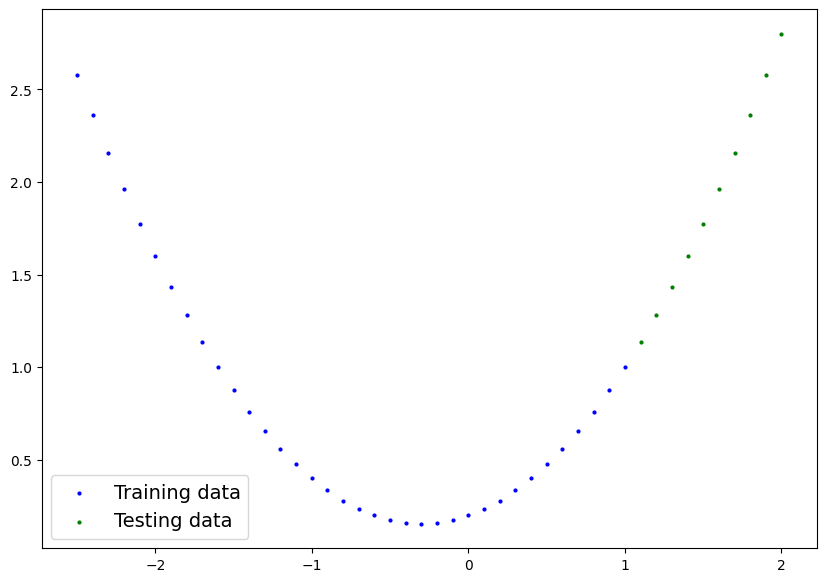

In [5]:
def plot_predictions(training_data=X_train, training_labels=Y_train, testing_data=X_test, testing_labels=Y_test, preds = None):
    plt.figure(figsize=(10, 7))

    plt.scatter(training_data, training_labels, c="b", s=4, label="Training data")
    plt.scatter(testing_data, testing_labels, c="g", s=4, label="Testing data")
    if preds is not None:
        plt.scatter(testing_data, preds, c="r", s=4, label="Predictions")

    plt.legend(prop={"size": 14})

plot_predictions()

In [6]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.b = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.c = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.optimizer = torch.optim.Rprop(params=self.parameters(), lr=0.01)
        self.epochs = []
        self.test_loss_values = []
        self.loss_values = []

    def forward(self, x):
        return self.a*x**2 + self.b*x + self.c
    
    def loss(self, predictions, labels):
        loss_fn = nn.MSELoss()
        loss = loss_fn(predictions, labels)
        return loss
    
    def train_model(self, num_of_epochs, input, labels):
        counter = 0
        for epoch in range(num_of_epochs):
            self.train()
            predictions = self.forward(input)
            loss = self.loss(predictions, labels)
            self.optimizer.zero_grad()
            loss.backward()
            self.optimizer.step()
            counter += 1
            if counter % 10 == 0:
                print(f"Loss: {loss}")
                self.epochs.append(counter)
                self.loss_values.append(loss)
                print(self.state_dict())
    
    def test_model(self, epoch_num, input, labels):
        counter = 0
        for epoch in range(epoch_num):
            self.eval()
            with torch.inference_mode():
                predictions = self.forward(input)
                test_loss = self.loss(predictions, labels)
                counter += 1
            if counter % 10 == 0:
                print(f"Test loss: {test_loss}")
                self.test_loss_values.append(test_loss)
                print(self.state_dict())



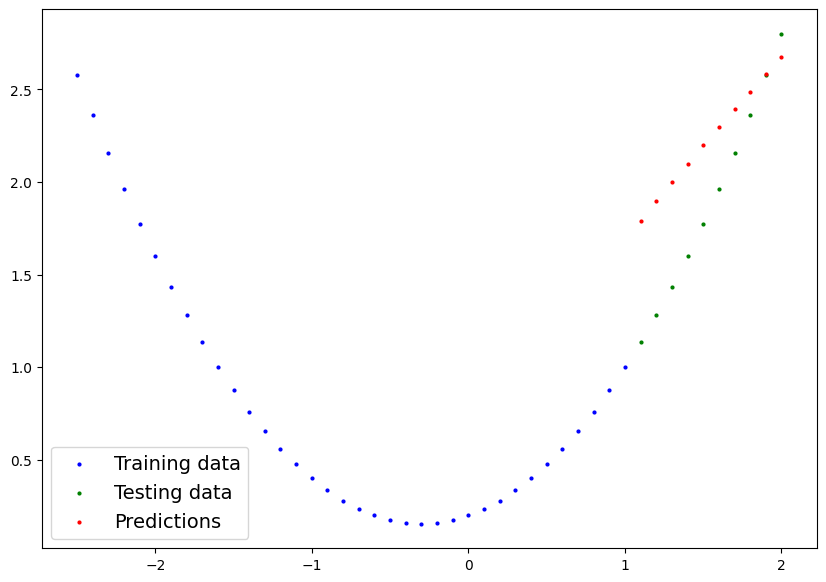

In [12]:
model = MyModel()

with torch.inference_mode():
    preds = model(X_test)

plot_predictions(preds=preds)

Loss: 2.168480634689331
OrderedDict([('a', tensor([0.1840])), ('b', tensor([0.9549])), ('c', tensor([0.8063]))])
Loss: 0.11724229902029037
OrderedDict([('a', tensor([0.5602])), ('b', tensor([0.5787])), ('c', tensor([0.4627]))])
Loss: 0.005172055214643478
OrderedDict([('a', tensor([0.5600])), ('b', tensor([0.4088])), ('c', tensor([0.1538]))])
Loss: 0.0002934966469183564
OrderedDict([('a', tensor([0.5115])), ('b', tensor([0.3215])), ('c', tensor([0.1982]))])
Loss: 2.4744647816987708e-05
OrderedDict([('a', tensor([0.5050])), ('b', tensor([0.3051])), ('c', tensor([0.1962]))])
Loss: 8.742945283302106e-06
OrderedDict([('a', tensor([0.5022])), ('b', tensor([0.3025])), ('c', tensor([0.1968]))])
Loss: 3.1481340556638315e-07
OrderedDict([('a', tensor([0.5003])), ('b', tensor([0.3008])), ('c', tensor([0.1999]))])
Loss: 4.8723347134682626e-08
OrderedDict([('a', tensor([0.5002])), ('b', tensor([0.3004])), ('c', tensor([0.1999]))])
Loss: 6.302105060029817e-09
OrderedDict([('a', tensor([0.5001])), ('

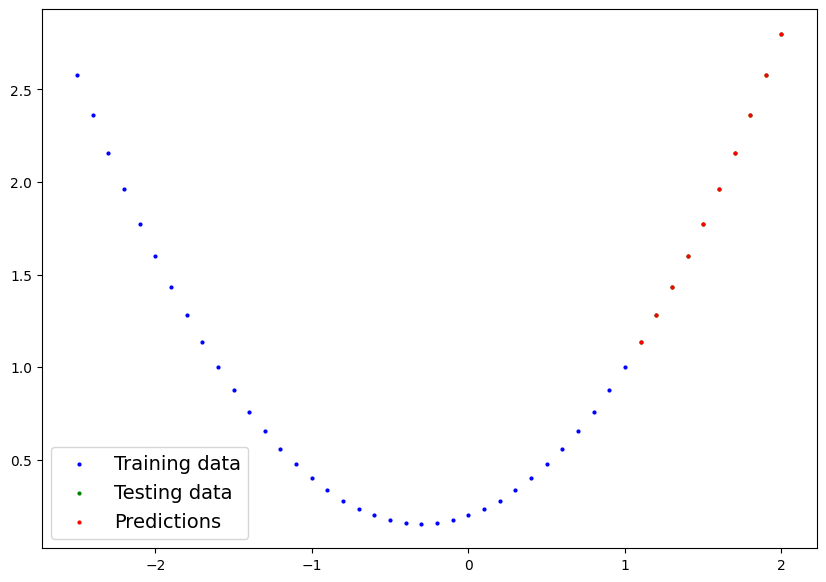

In [13]:
model.train_model(100, X_train, Y_train)
model.test_model(100, X_test, Y_test)

with torch.inference_mode():
    new_preds = model(X_test)

plot_predictions(preds=new_preds)

In [1]:
"""
plt.plot(model.epochs, np.array(torch.tensor(model.loss_values).numpy()), label="Train loss")
plt.plot(model.epochs, model.test_loss_values, label="Test loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
"""

'\nplt.plot(model.epochs, np.array(torch.tensor(model.loss_values).numpy()), label="Train loss")\nplt.plot(model.epochs, model.test_loss_values, label="Test loss")\nplt.ylabel("Loss")\nplt.xlabel("Epoch")\nplt.legend()\n'